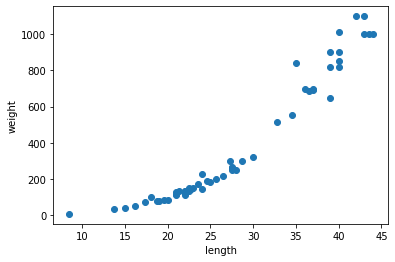

(4,)
(2, 2)
(42, 1) (14, 1)
테스트 세트 : 0.9928094061010639
19.157142857142862
훈련 세트 : 0.9698823289099255
0.9804899950518966
0.974645996398761


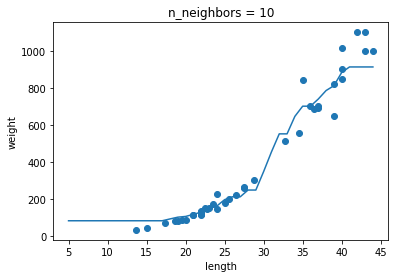

In [14]:
# k-최근접 이웃 회귀 

# 데이터 준비

import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 배열 크기 바꾸기
test_array = np.array([1,2,3,4])
print(test_array.shape)
test_array = test_array.reshape(2,2) # reshape() 함수로 배열의 크기를 바꿀 수 있다. 한번에 n차원 배열로 변경이 가능하다는 소리다.
print(test_array.shape)

# 실사용 배열 크기 변경하기
train_input = train_input.reshape(-1,1) # 크기에 -1을 지정하면 나머지 원소 개수로 모두 채우라는 의미이다.
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

# 결정계수(R^2)

from sklearn.neighbors import KNeighborsRegressor # k-최근접 이웃 회귀 알고리즘
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련합니다.
knr.fit(train_input, train_target)

print("테스트 세트 :", knr.score(test_input, test_target)) # 회귀에서는 정확한 숫자를 맞힌다는 것은 거의 불가능 하다. 예측하는 값이나 타깃 모두 임의의 수치이기 때문이다.


from sklearn.metrics import mean_absolute_error # 타깃과 예측의 절댓값 오차를 평균하여 변환

# 테스트 세트에 대한 예측을 만든다.
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

# 과대적합 vs 과소적합

print("훈련 세트 :",knr.score(train_input, train_target))

knr.n_neighbors = 3

# 모델을 다시 훈련시킵니다.
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

print(knr.score(test_input, test_target))

knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)

# n = 1,5,10일 때 예측 결과를 그래프로 그립니다
for n in [1,5,10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  # 지정한 범위 x에 대한 예측을 구합니다.
  prediction = knr.predict(x)

plt.scatter(train_input, train_target)
plt.plot(x, prediction)
plt.title('n_neighbors = {}'.format(n))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()